In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt

In [3]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [4]:
mat = scio.loadmat('simul_out/80-70_day_13880.mat')
T = mat.get('temperature_int_save')
p = mat.get('pint')[0]

dat=xr.open_dataset('ERA5/T_dt80')['t']
dat2 = xr.open_dataset('ERA5/T70')['t']



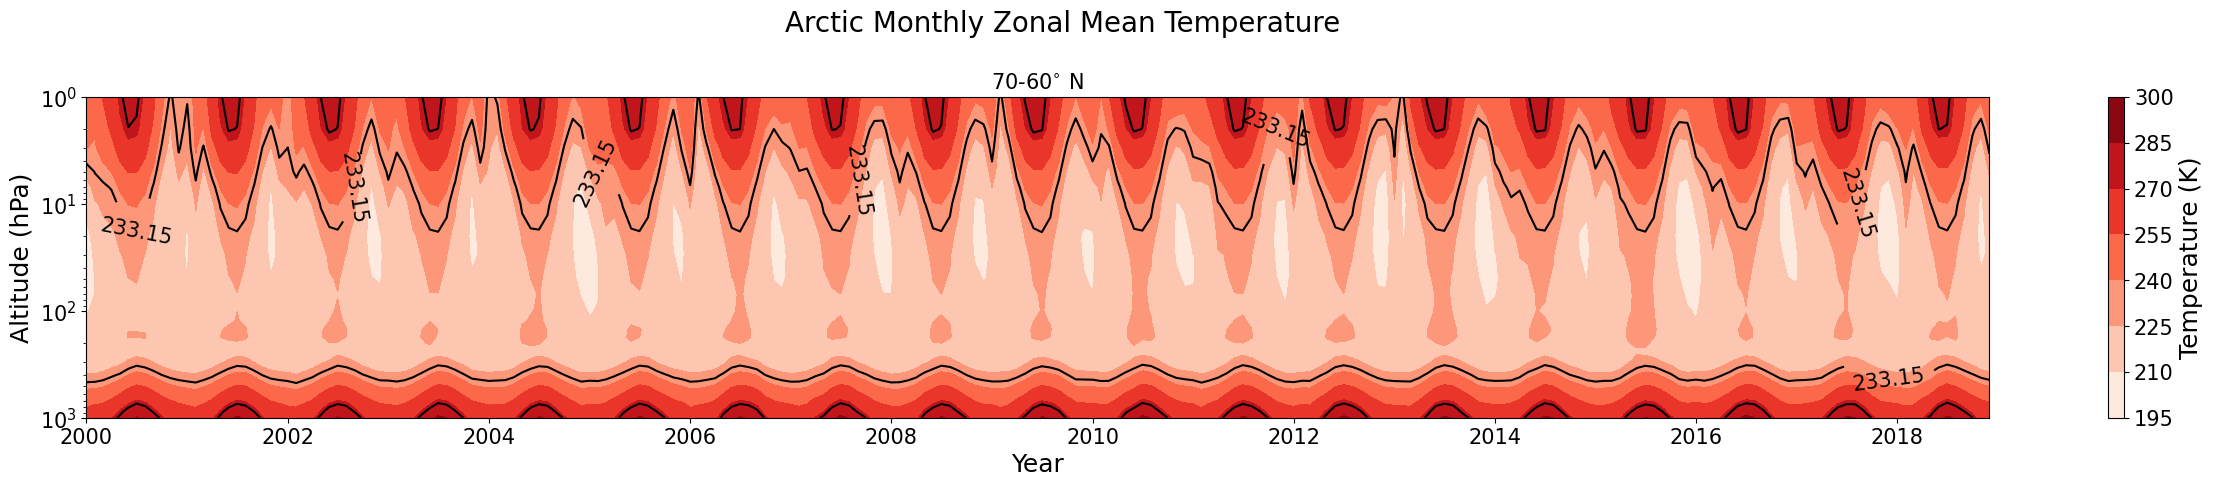

In [5]:
fig, ax =  plt.subplots(1, 1, figsize=(25,5))
fig.suptitle('Arctic Monthly Zonal Mean Temperature', x=0.43)
cs = ax.contourf(dat2['month_period'], dat2['level'], dat2.transpose('level', 'month_period'), cmap='Reds', levels = 5)
cs2 = ax.contour(dat2['month_period'], dat2['level'], dat2.transpose('level', 'month_period'), levels=[233.15, 273.15], colors='black', linewidths=1.5)
ax.set_yscale('log')
ax.set_xlabel('Year')
ax.set_ylabel('Altitude (hPa)')
ax.set_title(r''+str(70)+'-'+str(60)+'$^{\circ}$ N')
fig.colorbar(cs, label='Temperature (K)', ax=ax)
ax.clabel(cs2)
ax.invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots/Mean_T70_decadal.png', bbox_inches='tight')

In [6]:
T2 = []
for i in range(len(T)//2):
    temp = (T[2*i]+T[2*i+1])/2
    T2.append(temp)

T2 = np.array(T2)


In [8]:
T2

array([[285.8112675 , 286.90450117, 275.48472061, ..., 224.07138914,
        233.8014003 , 257.4197658 ],
       [311.207875  , 313.06023498, 293.53942029, ..., 225.8770388 ,
        235.23557312, 256.68417522],
       [322.744945  , 324.90831199, 304.17978521, ..., 227.59569484,
        236.5444261 , 256.84672403],
       ...,
       [269.496315  , 271.9246042 , 260.48675512, ..., 241.2627495 ,
        244.94282595, 256.12037912],
       [269.4350325 , 271.86712542, 260.44228023, ..., 241.22748832,
        244.93446295, 256.41775303],
       [269.369695  , 271.80528892, 260.39429362, ..., 241.20811088,
        244.94838452, 256.60546556]])

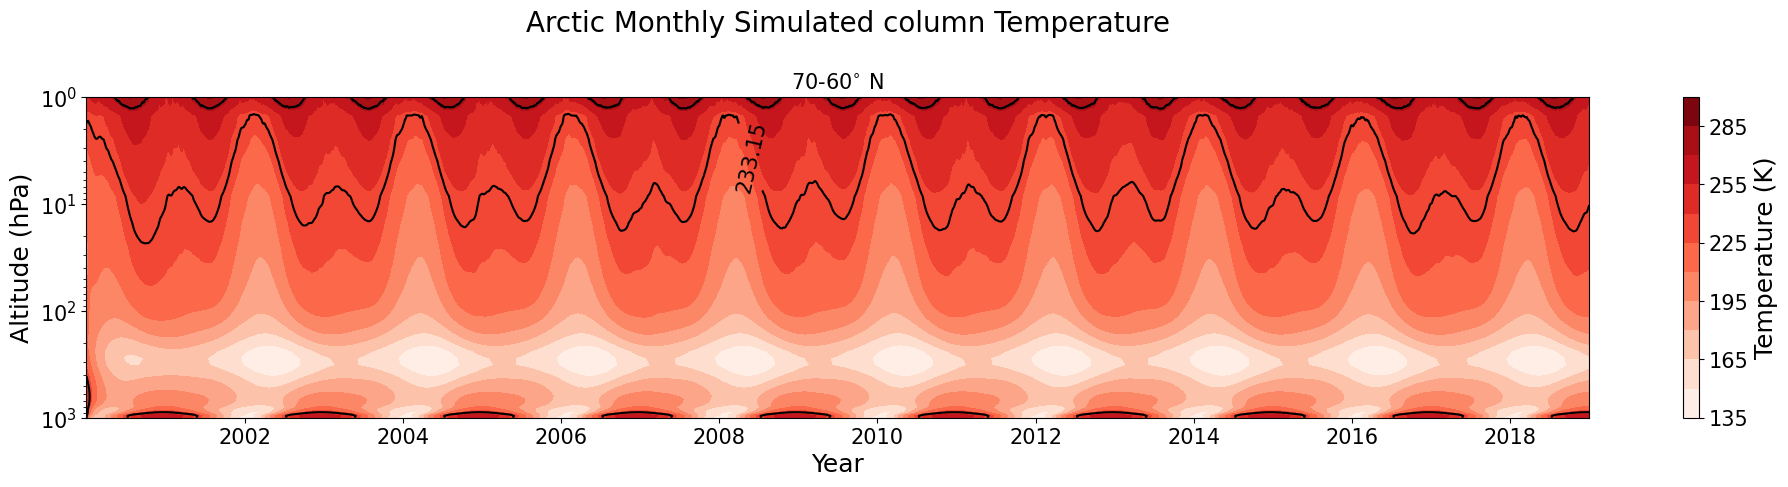

In [10]:
fig, ax =  plt.subplots(1, 1, figsize=(20, 5))
fig.suptitle('Arctic Monthly Simulated column Temperature', x=0.43)
cs = ax.contourf(dat['time'], p, T2.transpose(), cmap='Reds', levels = 10)
cs2 = ax.contour(dat['time'], p, T2.transpose(), levels=[233.15, 273.15], colors='black', linewidths=1.5)
ax.set_yscale('log')
ax.set_xlabel('Year')
ax.set_ylabel('Altitude (hPa)')
ax.set_title(r''+str(70)+'-'+str(60)+'$^{\circ}$ N')
fig.colorbar(cs, label='Temperature (K)', ax=ax)
ax.clabel(cs2)
ax.invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots/Simul_T70_decadal.png', bbox_inches='tight')

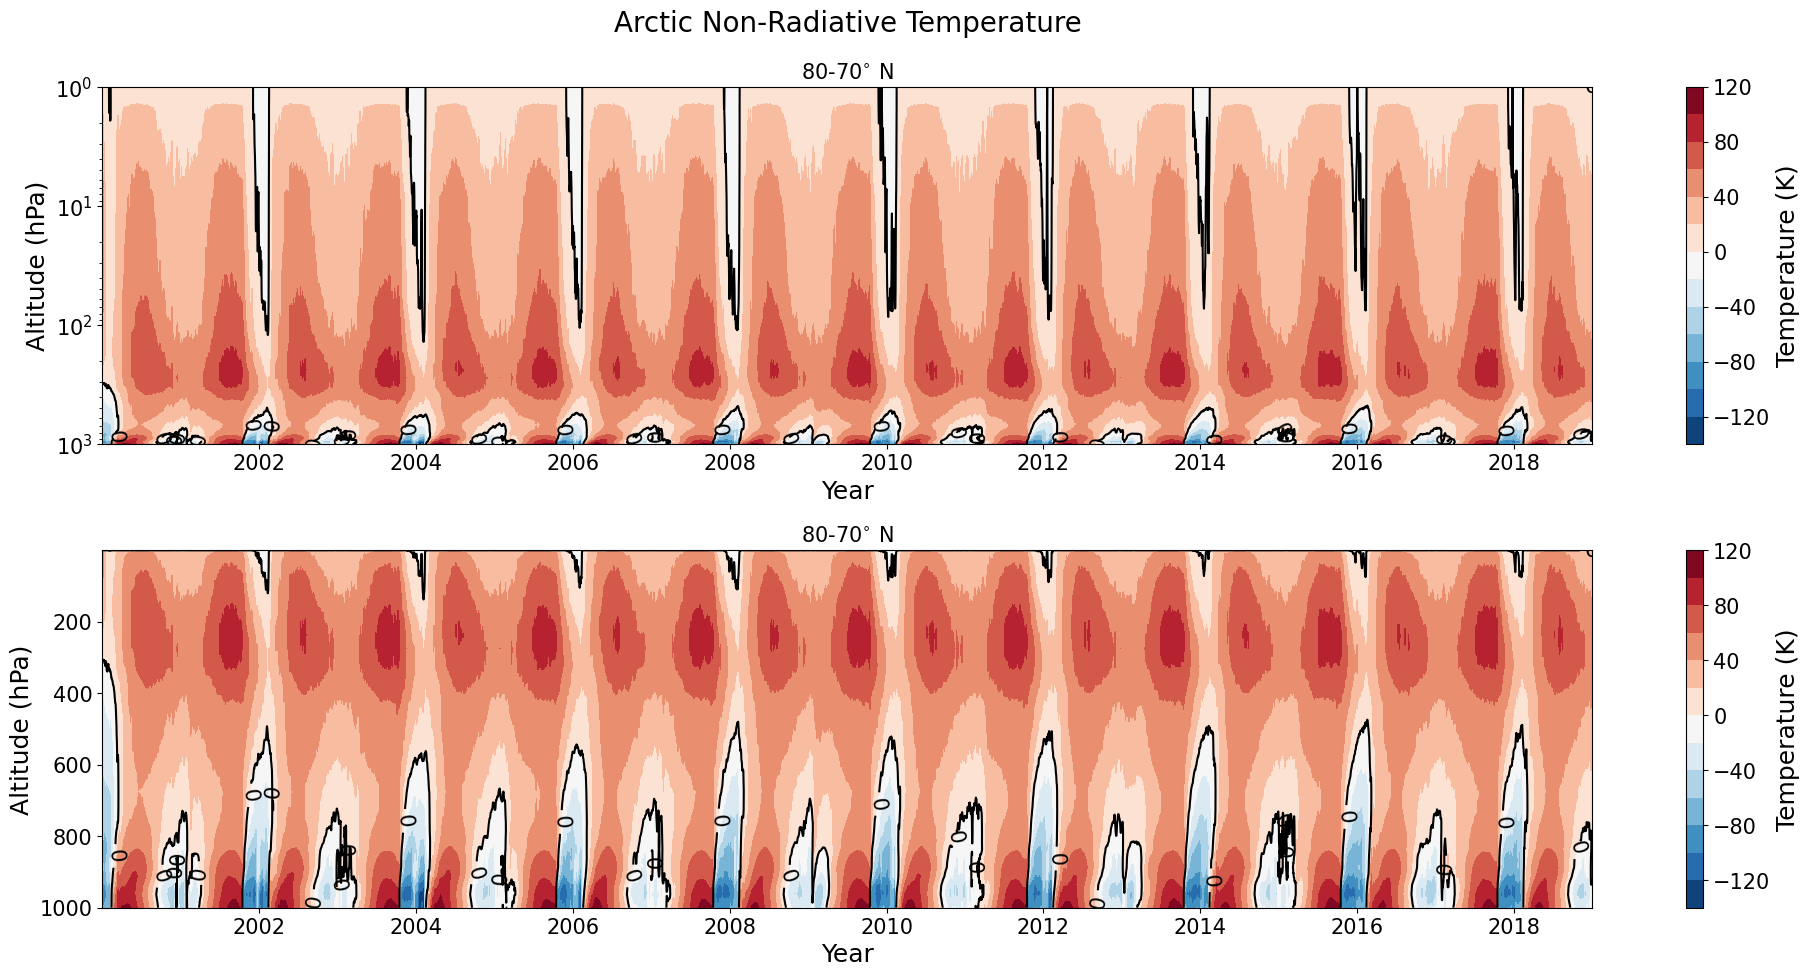

In [22]:
fig, ax =  plt.subplots(2, 1, figsize=(20, 10))
fig.suptitle('Arctic Non-Radiative Temperature', x=0.43)
for i in range(2):
    cs = ax[i].contourf(dat['time'], p, dat.transpose('level', 'time')-T2.transpose(), cmap='RdBu_r', levels = 15)
    cs2 = ax[i].contour(dat['time'], p, dat.transpose('level', 'time')-T2.transpose(), levels=[0], colors='black', linewidths=1.5)
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(80)+'-'+str(70)+'$^{\circ}$ N')
    ax[i].clabel(cs2)
    fig.colorbar(cs, label='Temperature (K)', ax=ax[i])
    ax[i].invert_yaxis()
ax[0].set_yscale('log')
    
plt.tight_layout()
fig.savefig('Plots/Non_rad_T80.png', bbox_inches='tight')